### Import Libraries

In [1]:
# YOLO object detection
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Deep Neural Network with YOLO Configuration and Weights

In [2]:
yolo = cv.dnn.readNetFromDarknet('yolov3.cfg', 'yolov3.weights')

### Read COCO file

In [3]:
classes=[]

with open("coco.names","r") as f:
    classes=f.read().splitlines()

In [4]:
len(classes)

80

### Read Input Image and Convert it to Blob

In [5]:
img = cv.imread('images/dog_cat.jpg')
blob = cv.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)

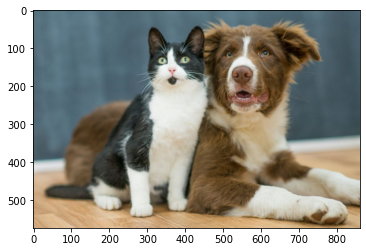

In [6]:
img_color=cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img_color);

### Acquire Height, Width and Number of Channels from Input Image

In [7]:
height, width, channels = img.shape

In [8]:
img.shape

(573, 860, 3)

In [9]:
blob.shape

(1, 3, 416, 416)

### Set blob as Input

In [10]:
yolo.setInput(blob)

### Get Output Layers

In [11]:
output_layers_name=yolo.getUnconnectedOutLayersNames()
layeroutput=yolo.forward(output_layers_name)

### Loop through Output Layers

In [12]:
boxes=[]
confidences=[]
class_ids=[]

### Filter bounding boxes with confidence levels

In [13]:
for output in layeroutput:
    for detection in output:
        score=detection[5:]
        class_id=np.argmax(score)
        confidence=score[class_id]
        
        if confidence>0.7:
            center_x=int(detection[0]*width)
            center_y=int(detection[1]*height)
            w=int(detection[2]*width)
            h=int(detection[3]*height)
            
            x=int(center_x-w/2)
            y=int(center_y-h/2)
            
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

### Set indexes, font and colors for each bounding box

In [14]:
indexes = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
font = cv.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(len(classes), 3))

### Draw Bounding Box and Text on the input image

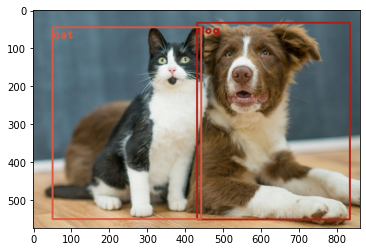

In [15]:
 if len(indexes)>0:
    for i in indexes.flatten():
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[class_ids[i]]
        cv.rectangle(img, (x, y), (x + w, y + h), color, 3)
        cv.putText(img, label, (x, y + 30), font, 2, color, 3)

            


img_color=cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img_color);

### Draw Bounding Box and Text on the input image

In [16]:
#  for i in range(len(boxes)):
#         if i in indexes:
#             x, y, w, h = boxes[i]
#             label = str(classes[class_ids[i]])
#             color = colors[class_ids[i]]
#             cv.rectangle(img, (x, y), (x + w, y + h), color, 3)
#             cv.putText(img, label, (x, y + 30), font, 2, color, 3)

            


# img_color=cv.cvtColor(img,cv.COLOR_BGR2RGB)
# plt.imshow(img_color);

In [17]:
cv.imwrite('dog_cat_result.jpg',img_color)

True